In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

#Kütüphaneleri yükle - Install libraries 

In [41]:
# CSV dosyanı yükle - Upload your CSV file
df = pd.read_csv("cumulative.csv")


In [45]:
# Veri kümesinin ilk 5 satırını görüntüle - Display the first 5 rows of the data set
print(df.head())

   rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0      1.000              0              0              0  ...   
1      0.969              0              0              0  ...   
2      0.000              0              1              0  ...   
3      0.000              0              1              0  ...   
4      1.000              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064    

In [47]:
# Eksik değerleri kontrol et- Check for missing values
print(df.isnull().sum())

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [49]:
# Durumların sayısını incele - Examine the number of cases
print(df['koi_disposition'].value_counts())

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64


C:\Users\aziz-\AppData\Local\Temp\ipykernel_11748\2938363481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='koi_disposition', data=df, palette='viridis')


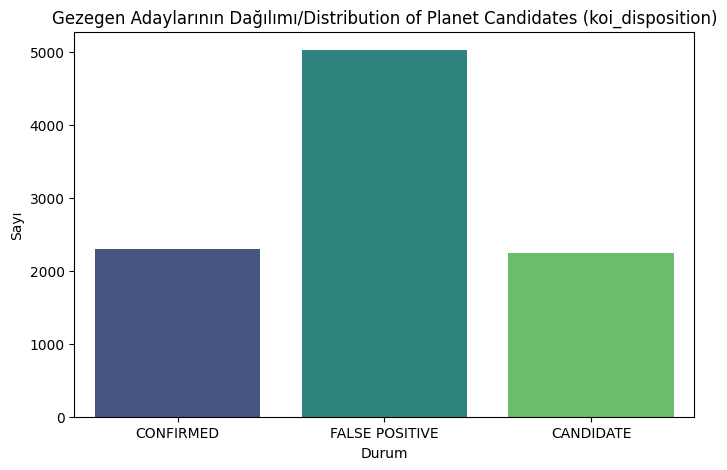

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(x='koi_disposition', data=df, palette='viridis')
plt.title("Gezegen Adaylarının Dağılımı/Distribution of Planet Candidates (koi_disposition)")
plt.xlabel("Durum")
plt.ylabel("Sayı")
plt.show()
#Distribution of Planet Candidates

In [53]:
# Analiz etmek istediğin sütunlar - Columns you want to analyse
selected_columns = ['koi_prad', 'koi_period', 'koi_steff', 'koi_score']

# Gruplandırarak ortalamaları hesapla - Calculate averages by grouping
group_stats = df.groupby('koi_disposition')[selected_columns].mean().round(2)

print(group_stats)


                 koi_prad  koi_period  koi_steff  koi_score
koi_disposition                                            
CANDIDATE           15.93      130.52    5639.77       0.90
CONFIRMED            2.87       27.06    5477.97       0.96
FALSE POSITIVE     191.64       73.31    5848.87       0.01


C:\Users\aziz-\AppData\Local\Temp\ipykernel_11748\499077548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='koi_disposition', y='koi_prad', data=df, palette='Set2')


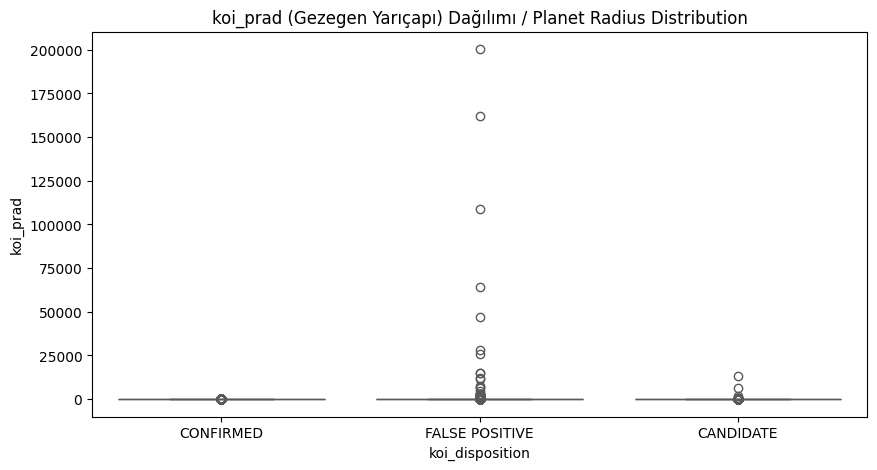

In [55]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='koi_disposition', y='koi_prad', data=df, palette='Set2')
plt.title("koi_prad (Gezegen Yarıçapı) Dağılımı / Planet Radius Distribution")
plt.show()


C:\Users\aziz-\AppData\Local\Temp\ipykernel_11748\2509994064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='koi_disposition', y='koi_period', data=df, palette='Set3')


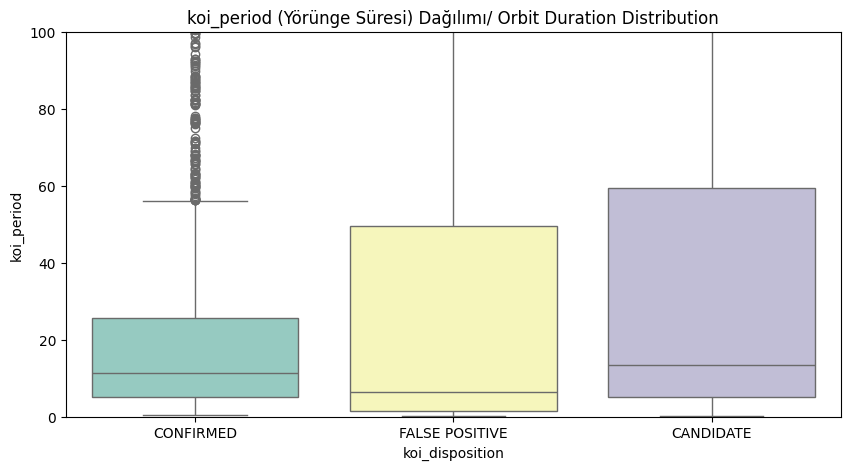

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='koi_disposition', y='koi_period', data=df, palette='Set3')
plt.ylim(0, 100)  # Aykırı değerleri bastırmak için (istersen kaldırabilirsin)
plt.title("koi_period (Yörünge Süresi) Dağılımı/ Orbit Duration Distribution")
plt.show()


C:\Users\aziz-\AppData\Local\Temp\ipykernel_11748\2099306662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='koi_disposition', y='koi_steff', data=df, palette='Set1')


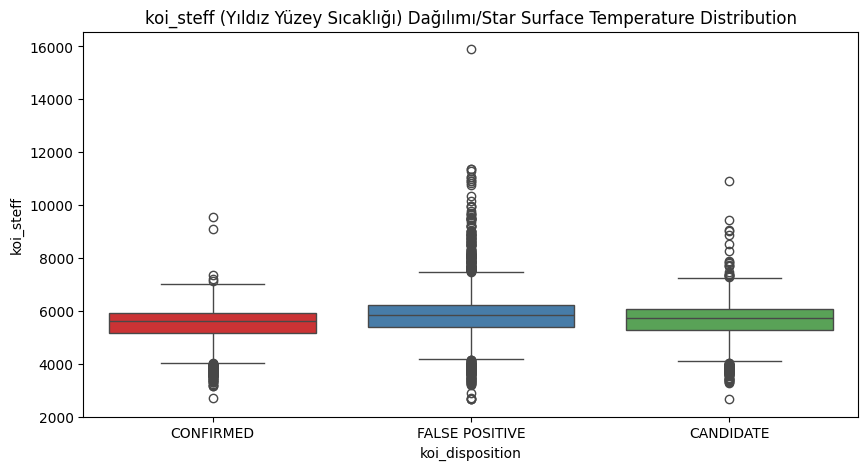

In [59]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='koi_disposition', y='koi_steff', data=df, palette='Set1')
plt.title("koi_steff (Yıldız Yüzey Sıcaklığı) Dağılımı/Star Surface Temperature Distribution")
plt.show()


In [61]:
habitable_candidates = df[
    (df['koi_disposition'] == 'CONFIRMED') &
    (df['koi_steff'].between(5300, 6000)) &
    (df['koi_prad'] < 2) &
    (df['koi_srad'].between(0.8, 1.2)) &
    (df['koi_period'].between(200, 400)) &
    (df['koi_score'] > 0.9)
]

print(f"Yaşanabilir aday sayısı/Number of viable candidates: {len(habitable_candidates)}")
habitable_candidates[['kepoi_name', 'koi_prad', 'koi_steff', 'koi_period', 'koi_score']]
#Number of viable candidates

Yaşanabilir aday sayısı/Number of viable candidates: 0


,kepoi_name,koi_prad,koi_steff,koi_period,koi_score


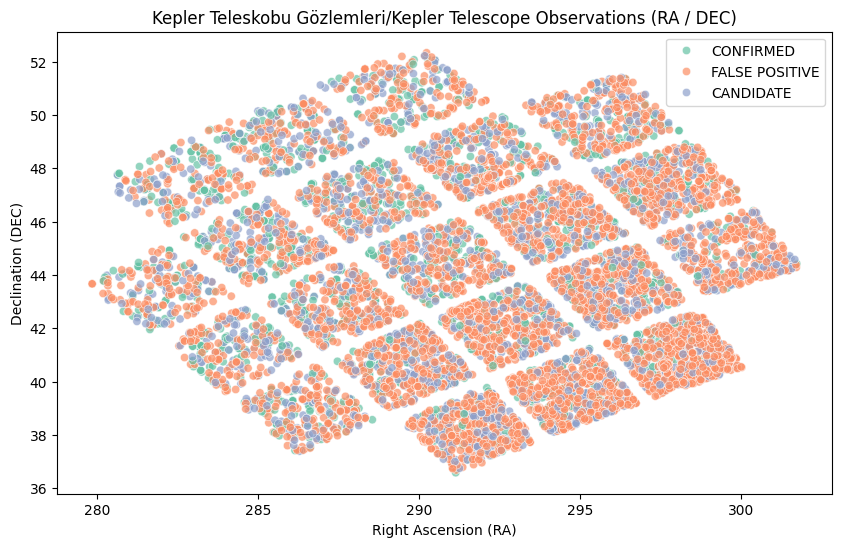

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ra', y='dec', hue='koi_disposition', alpha=0.7, palette='Set2')
plt.title("Kepler Teleskobu Gözlemleri/Kepler Telescope Observations (RA / DEC)")
plt.xlabel("Right Ascension (RA)")
plt.ylabel("Declination (DEC)")
plt.legend()
plt.show()


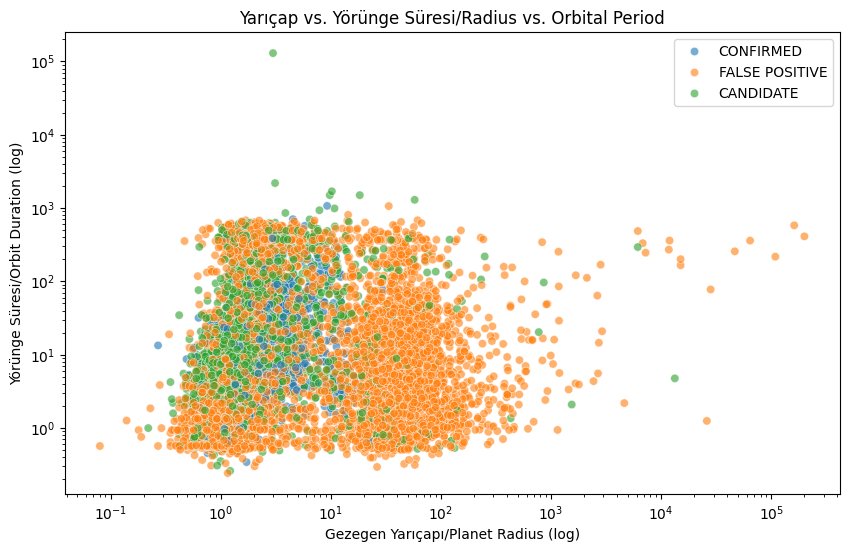

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='koi_prad', y='koi_period', hue='koi_disposition', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Gezegen Yarıçapı/Planet Radius (log)")
plt.ylabel("Yörünge Süresi/Orbit Duration (log)")
plt.title("Yarıçap vs. Yörünge Süresi/Radius vs. Orbital Period")
plt.legend()
plt.show()


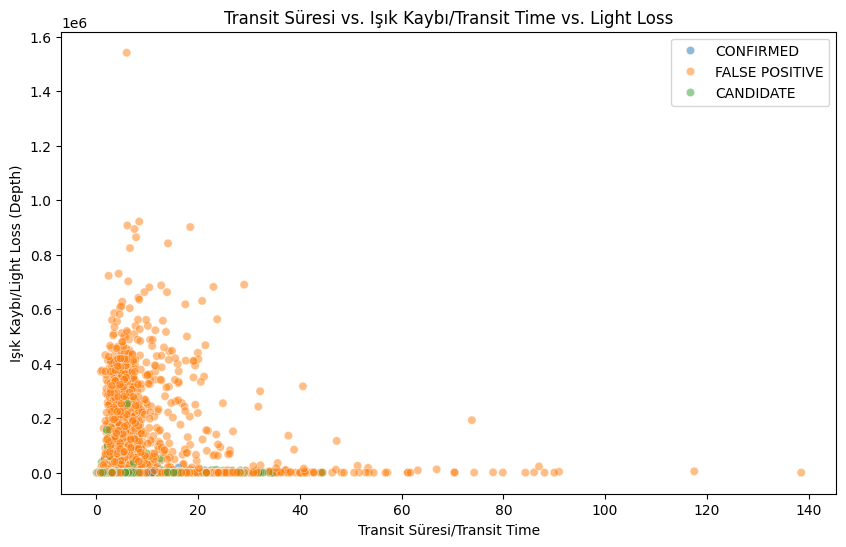

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='koi_duration', y='koi_depth', hue='koi_disposition', alpha=0.5)
plt.xlabel("Transit Süresi/Transit Time")
plt.ylabel("Işık Kaybı/Light Loss (Depth)")
plt.title("Transit Süresi vs. Işık Kaybı/Transit Time vs. Light Loss")
plt.legend()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

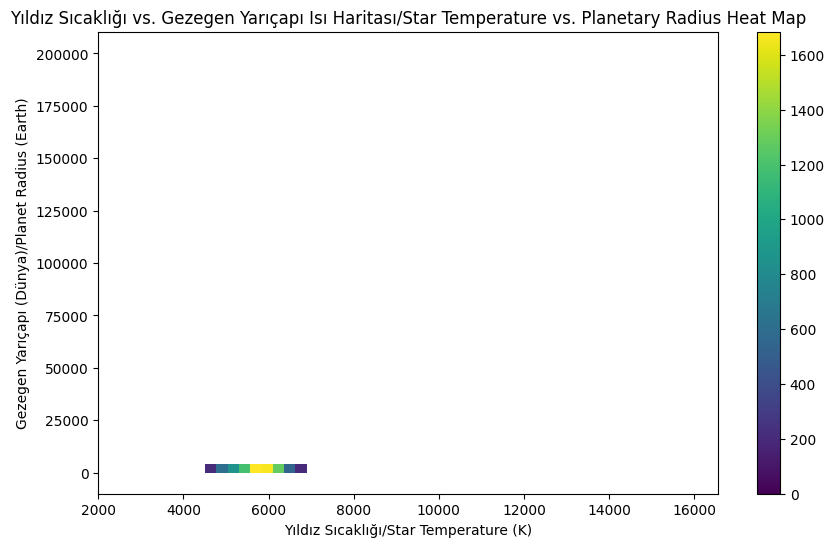

In [69]:
plt.figure(figsize=(10,6))
heatmap_data = df[['koi_steff', 'koi_prad']].dropna()
sns.histplot(
    data=heatmap_data,
    x='koi_steff', y='koi_prad',
    bins=50, pthresh=.1, cmap='viridis', cbar=True
)
plt.title("Yıldız Sıcaklığı vs. Gezegen Yarıçapı Isı Haritası/Star Temperature vs. Planetary Radius Heat Map")
plt.xlabel("Yıldız Sıcaklığı/Star Temperature (K)")
plt.ylabel("Gezegen Yarıçapı (Dünya)/Planet Radius (Earth)")
plt.show()


In [71]:
planet_counts_per_star = df['kepid'].value_counts()
multi_planet_stars = planet_counts_per_star[planet_counts_per_star > 1]

print(f"Çok gezegenli yıldız sayısı/Number of multi-planet stars: {len(multi_planet_stars)}")

# Örnek olarak birkaç tanesini görüntüleyelim / Let's display a few as examples:
df[df['kepid'].isin(multi_planet_stars.index)].sort_values(by='kepid').head(10)


Çok gezegenli yıldız sayısı/Number of multi-planet stars: 938


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7241,7242,1432789,K00992.02,NaN,CANDIDATE,CANDIDATE,0.961,0,0,0,...,-78.0,4.280,0.137,-0.112,1.220,0.196,-0.176,291.49942,37.059280,15.214
435,436,1432789,K00992.01,Kepler-745 b,CONFIRMED,CANDIDATE,0.848,0,0,0,...,-78.0,4.280,0.137,-0.112,1.220,0.196,-0.176,291.49942,37.059280,15.214
2830,2831,1717722,K03145.02,NaN,CANDIDATE,CANDIDATE,0.858,0,0,0,...,-144.0,4.633,0.027,-0.059,0.688,0.079,-0.045,290.61798,37.289089,15.689
2829,2830,1717722,K03145.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-144.0,4.633,0.027,-0.059,0.688,0.079,-0.045,290.61798,37.289089,15.689
436,437,1718189,K00993.01,Kepler-262 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-161.0,4.540,0.044,-0.187,0.876,0.234,-0.078,290.72867,37.252651,14.246
454,455,1718189,K00993.02,Kepler-262 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-161.0,4.540,0.044,-0.187,0.876,0.234,-0.078,290.72867,37.252651,14.246
7282,7283,1718189,K00993.03,NaN,FALSE POSITIVE,FALSE POSITIVE,0.149,0,1,0,...,-161.0,4.540,0.044,-0.187,0.876,0.234,-0.078,290.72867,37.252651,14.246
3793,3794,1724719,K04212.01,Kepler-1569 b,CONFIRMED,CANDIDATE,0.956,0,0,0,...,-86.0,4.244,0.125,-0.125,1.318,0.243,-0.199,292.20471,37.221218,13.960
3812,3813,1724719,K04212.02,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-86.0,4.244,0.125,-0.125,1.318,0.243,-0.199,292.20471,37.221218,13.960
498,499,1871056,K01001.02,Kepler-264 c,CONFIRMED,CANDIDATE,0.991,0,0,0,...,-125.0,3.963,0.195,-0.105,2.097,0.350,-0.569,292.04462,37.376240,13.038


In [139]:
#Number of planet candidates with the highest habitability score
def habitability_score(row):
    score = 0
    # Yaricapı 2'den küçükse - If the radius is less than 2
    if row['koi_prad'] < 2:
        score += 1
    # Yıldız sıcaklığı Güneş benzeriyse - If the star temperature is similar to the Sun
    if 5300 <= row['koi_steff'] <= 6000:
        score += 1
    # Yörünge süresi 200–400 günse - If the orbital period is 200-400 days
    if 200 <= row['koi_period'] <= 400:
        score += 1
    # koi_score yüksekse - if koi_score is high
    if row['koi_score'] > 0.9:
        score += 1
    return score

df['habitability_score'] = df.apply(habitability_score, axis=1)

# En yüksek skorlu gezegenleri listele - List the highest scoring planets
top_habitable = df[df['habitability_score'] == 4]
print(f"En yüksek yaşanabilirlik skoruna sahip gezegen adayı sayısı: \nNumber of planet candidates with the highest habitability score: {len(top_habitable)}")
top_habitable[['kepoi_name', 'koi_prad', 'koi_steff', 'koi_period', 'koi_score']]


En yüksek yaşanabilirlik skoruna sahip gezegen adayı sayısı: 
Number of planet candidates with the highest habitability score: 3


,kepoi_name,koi_prad,koi_steff,koi_period,koi_score
4739,K07711.01,1.31,5734.0,302.779824,0.987
8593,K07223.01,1.59,5366.0,317.062416,0.947
9000,K08000.01,1.70,5663.0,225.488050,0.975
